In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
import sklearn.metrics as metrics

import functions as fun

In [138]:
# Define function to load data file, setup the features, normalize features
#    and use the model for prediction

# FUNCTION PARAMETERS:
# filename = [str] file path of spectra data to be estimated
# output = [True or False] print temperature results 

def temp_predict(filename, output):
    
    # Import model parameters
    model_filename = 'NN_model_bones.sav'   # Model filename
    model = pickle.load(open(model_filename, 'rb'))

    # Import training data summary (mean, std, etc...) for feature normalization
    train_data_summary = pd.read_csv('train_data_summary.csv').set_index('Unnamed: 0')
    train_data_summary.index.name = None 
        
    data = pd.read_csv(filename, names=['w','amp'], header=None)
    feature_df = fun.feature_setup(data)
    feature_norm = (feature_df - train_data_summary.loc['mean'])/train_data_summary.loc['std'] # normalize feature df
    feature_norm = feature_norm[['560 w',
                           '560 amp',
                           '610 w',
                           '560/610',
                           '645/610',
                           '865 shoulder',
                           '1040 w',
                           '3400 w']]
    
    pred_temp = model.predict(feature_norm)[0]
    sample_name = filename.split('/')[-1]
    sample_name = sample_name.split('.')[0]    
    
    if output == True:
        print(sample_name+'     Temp: '+str(int(pred_temp))+' C')
    
    return [sample_name, pred_temp]

In [147]:
# Example
# 
temp_predict('modern_bones_baselined/@M1 200C.csv',output=True)

@M1 200C     Temp: 158 C


['@M1 200C', 158.0678684587528]

# Predict list of data files

In [155]:
# Take list of datafiles and save the predicted temperatures to a csv file

path = 'full spectra mid/'
file_list = ['TD10-2-BB-2009-H12-60 @',
             'TD10-2-BB-2009-J17-94@',
             'TD10-2-BB-2009-J20-202@',
             'TD10-2-BB-2009-K12-108@',
             'TD10-2-BB-2009-K15-92@',
             'TD10-2-BB-2009-L11-111@',
             'TD10-2-BB-2009-L13-251@',
             'TD10-2-BB-2009-M12-158@',
             'TD10-2-BB-2009-M16-695@',
             'TD10-2-BB-2009-M17-42@',
             'TD10-2-BB-2009-M21-354@',
             'TD10-2-BB-2009-M21-444@',
             'TD10-2-BB-2009-M22-118@',
             'TD10-2-BB-2009-N19-582@',
             'TD10-2-BB-O20-1@']

In [156]:
pred_temp_df = pd.DataFrame(data=[],columns=['sample','temperature'])
temp_dict = {}

for m in file_list:
    [sample,T] = temp_predict(path+m+'.csv',output=False)
    
    temp_dict['sample'] = sample
    temp_dict['temperature'] = T
    pred_temp_df = pred_temp_df.append(temp_dict,ignore_index=True)

# Save dataframe to .csv file
pred_temp_df.to_csv(path+'predicted_temperatures.csv',index=None)

,sample,temperature
0,TD10-2-BB-2009-H12-60 @,294.199800
1,TD10-2-BB-2009-J17-94@,448.797612
2,TD10-2-BB-2009-J20-202@,445.704899
3,TD10-2-BB-2009-K12-108@,149.371031
4,TD10-2-BB-2009-K15-92@,25.897935
5,TD10-2-BB-2009-L11-111@,179.353028
6,TD10-2-BB-2009-L13-251@,21.029388
7,TD10-2-BB-2009-M12-158@,69.854903
8,TD10-2-BB-2009-M16-695@,137.813536
9,TD10-2-BB-2009-M17-42@,764.691086


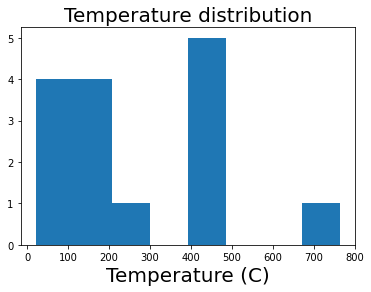

In [157]:
# plot predicted temperature distribution
plt.hist(pred_temp_df['temperature'],bins=8)
plt.xlabel('Temperature (C)',fontsize=20)
plt.title('Temperature distribution',fontsize=20)
pred_temp_df